In [4]:
from pandas import Series, DataFrame
import pandas as pd
import re
import json
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
list_of_common_words = ['the', 'and', 'to', 'on', 'a', 'of', 'for', 'in', 'you', 'with', 'what', 'who', 'how', 'why', 'is', 'i', 'by', 'this', 'my', 'more', 'from', 'at', 'it', 'that', 'but', 'or', 'so', 'either', 'neither', 'not', 'also', 'only', 'both', 'nor', 'front', 'next', 'above', 'under', 'off']

In [6]:
df = pd.read_csv("USvideos.csv")
df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [7]:
#Create dictionary of categories
id_to_category = {}
with open('US_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        id_to_category[category['id']] = category['snippet']['title']
        string_dict = dict([(int(k), str(v)) for k, v in id_to_category.items()])
    print string_dict

#string_dict
df.insert(4, 'category', df['category_id'].map(string_dict))
df.head(2)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."


In [8]:
print df.columns, len(df), len(df.columns)
print "***"

print df.isna().sum()

Index([u'video_id', u'trending_date', u'title', u'channel_title', u'category',
       u'category_id', u'publish_time', u'tags', u'views', u'likes',
       u'dislikes', u'comment_count', u'thumbnail_link', u'comments_disabled',
       u'ratings_disabled', u'video_error_or_removed', u'description'],
      dtype='object') 40949 17
***
video_id                    0
trending_date               0
title                       0
channel_title               0
category                    0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64


In [9]:
#to_datetime
df["trending_date"] = pd.to_datetime(df["trending_date"],format="%y.%d.%m")
df['publish_time'] = pd.to_datetime(df["publish_time"], format="%Y-%m-%dT%H:%M:%S.%fZ")
#df.head()

#split publish time into 2 columns
df.insert(5, 'publish_date', df['publish_time'].dt.date)
df.insert(6, 'publish_time_time', df['publish_time'].dt.time)
df.head()

#build column
df["time_to_trending"] = df["trending_date"] - df["publish_time"]
df["time_to_trending"][:5]

0   0 days 06:46:59
1   0 days 16:30:00
2   1 days 04:54:36
3   0 days 12:59:56
4   1 days 05:58:19
Name: time_to_trending, dtype: timedelta64[ns]

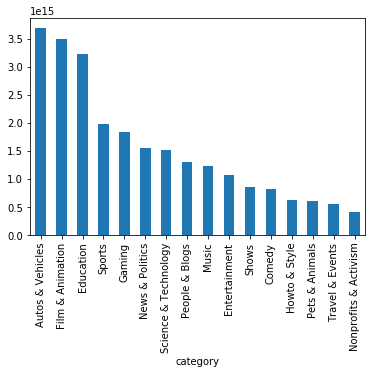

In [12]:
grouped = df.groupby(["category"])["time_to_trending"].apply(np.mean) #cant use agg here bc doesnt recognize timedelta obj
grouped.sort_values(ascending=False).plot(kind="bar")
#On average, shows and sports trend the fastest, while film and science/tech videos trend the slowest

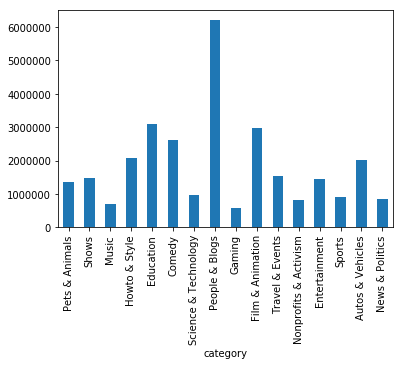

In [14]:
#Popular categories by video count
grouped2 = df.groupby(["category"])["title"].agg("count")
grouped2.sort_values(ascending=False).sort_values(ascending = False).plot(kind="bar") #Entertainment by far, then politics

#Popular categories by avg views
df.groupby(["category"])["views"].agg("mean").sort_values(ascending = False).plot(kind="bar") #music & movies have highest avg views by far (as expected)

#popular categories by like to dislike ratio
df["ratio_likes"] = df["likes"] / (df["likes"] + df["dislikes"])
df.groupby(["category"])["ratio_likes"].agg("mean").sort_values(ascending = False).plot(kind="bar") #meh plot, shows has lowest % of likes 

In [18]:
#most popular channel by avg views
grouped3 = df.groupby(["channel_title"])["views"].agg("mean")
print grouped3.sort_values(ascending=False)[:10] #ChildishGambino, YouTube, Kylie Jenner

#most popular channel by avg likes
df.groupby(["channel_title"])["likes"].agg("mean").sort_values(ascending=False)[:10] #ibighit (WHO??), Drake, ChildishG

#channel fastest to trending
trendy = df.groupby(["channel_title"])["time_to_trending"].apply(np.mean) #hmm. Weird things - 1 days
mask = (trendy < pd.Timedelta(0))
# len(trendy[mask]) #161 negatives. remove these


channel_title
ChildishGambinoVEVO    1.503396e+08
BeckyGVEVO             5.914856e+07
LuisFonsiVEVO          5.347388e+07
MalumaVEVO             4.848487e+07
Kylie Jenner           4.610644e+07
YouTube Spotlight      4.396603e+07
DrakeVEVO              4.168011e+07
TheWeekndVEVO          4.099002e+07
FoxStarHindi           3.870656e+07
ArianaGrandeVevo       3.667347e+07
Name: views, dtype: float64


In [24]:
def strToList(s):
    return s.lower().split()

titles_s = df['title'].map(strToList)
wordCounter_title = dict()
for i in titles_s:
    for j in i:
        pattern = re.compile('\W')
        j = re.sub(pattern, '', j)
        flag = 0
        for k in list_of_common_words:
            if j == k:
                flag = 1
        if flag == 1:
            continue
        if j in wordCounter_title:
            wordCounter_title[j] += 1
        else:
            wordCounter_title[j] = 1
sorted(wordCounter_title, key=wordCounter_title.get, reverse=True)[:20]

['',
 'official',
 'video',
 '2018',
 'trailer',
 'ft',
 'vs',
 'new',
 'me',
 '2',
 '2017',
 'makeup',
 'audio',
 'music',
 'hd',
 'live',
 'we',
 'first',
 'day',
 'challenge']

In [25]:
def strToList(s):
    return s.lower().split()

titles_s = df['channel_title'].map(strToList)
wordCounter_ctitle = dict()
for i in titles_s:
    for j in i:
        pattern = re.compile('\W')
        j = re.sub(pattern, '', j)
        flag = 0
        for k in list_of_common_words:
            if j == k:
                flag = 1
        if flag == 1:
            continue
        if j in wordCounter_ctitle:
            wordCounter_ctitle[j] += 1
        else:
            wordCounter_ctitle[j] = 1
sorted(wordCounter_ctitle, key=wordCounter_ctitle.get, reverse=True)[:20]

['news',
 'show',
 'late',
 'live',
 'entertainment',
 '',
 'pictures',
 'jimmy',
 'night',
 'fox',
 'morning',
 'bbc',
 'insider',
 'channel',
 'cbs',
 'james',
 'tonight',
 'good',
 'life',
 'nba']

In [13]:
def strToList(s):
    if type(s) == str:
        return s.lower().split()
titles_s = df['description'].map(strToList)
titles_s = titles_s.dropna()
wordCounter_desc = dict()
for i in titles_s:
    for j in i:
        pattern = re.compile('\W')
        j = re.sub(pattern, '', j)
        flag = 0
        for k in list_of_common_words:
            if j == k:
                flag = 1
        if flag == 1:
            continue
        if j in wordCounter_desc:
            wordCounter_desc[j] += 1
        else:
            wordCounter_desc[j] = 1
sorted(wordCounter_desc, key=wordCounter_desc.get, reverse=True)[:20]

['',
 'video',
 'out',
 '_',
 'our',
 'me',
 'here',
 'your',
 'us',
 'all',
 'as',
 'new',
 'we',
 'music',
 'videos',
 'are',
 'channel',
 'twitter',
 'be',
 'get']

In [14]:
def strToList(s):
    return s.lower().split()

titles_s = df['tags'].map(strToList)
wordCounter_tags = dict()
for i in titles_s:
    for j in i:
        pattern = re.compile('\W')
        j = re.sub(pattern, '', j)
        flag = 0
        for k in list_of_common_words:
            if j == k:
                flag = 1
        if flag == 1:
            continue
        if j in wordCounter_tags:
            wordCounter_tags[j] += 1
        else:
            wordCounter_tags[j] = 1
sorted(wordCounter_tags, key=wordCounter_tags.get, reverse=True)[:20]

['',
 'vs',
 'new',
 'music',
 'none',
 'makeup',
 'make',
 'me',
 'your',
 'late',
 'voice',
 'life',
 'official',
 'perfect',
 'night',
 'star',
 'wars',
 'show',
 'youtubeyoutube',
 'video']

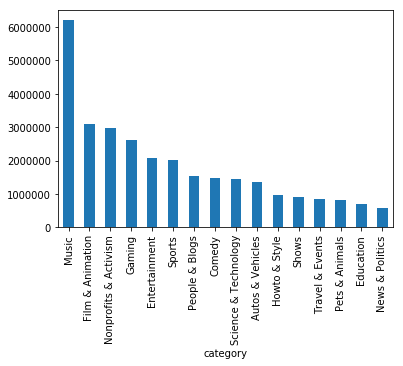

In [30]:
df.groupby('category')['views'].agg('mean').sort_values(ascending = False).plot(kind = 'bar')

In [11]:
df['comments_disabled'].value_counts()

False    40316
True       633
Name: comments_disabled, dtype: int64

In [12]:
df['ratings_disabled'].value_counts()

False    40780
True       169
Name: ratings_disabled, dtype: int64